# Stats

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df = pd.read_csv("lc_loan.csv")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Distributions

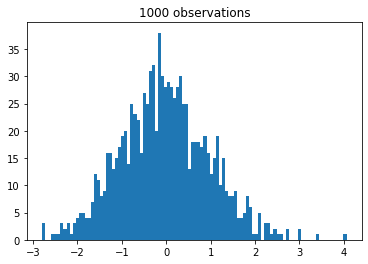

In [ ]:
# Exercise change observations
plt.figure()
observations= 1000
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=observations),100)
plt.title(f"{observations} observations")
plt.show()


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
​
%matplotlib notebook
​
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
​
# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])
​
plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')
​


SyntaxError: invalid character in identifier (2959463831.py, line 3)

In [ ]:
x = np.random.binomial(10,
                       .5,
                       1000
                       )
#_ = plt.plot(x)
print(x.mean())

5.12


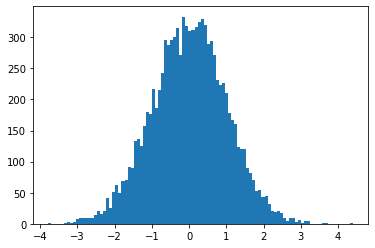

In [ ]:
x = np.random.normal(0,
                    1,
                    10000
                       )
_ = plt.hist(x,bins=100)


# Hauptwerte

## Mittelwert

In [6]:
df['loan_amnt'].mean()

14755.26460508982

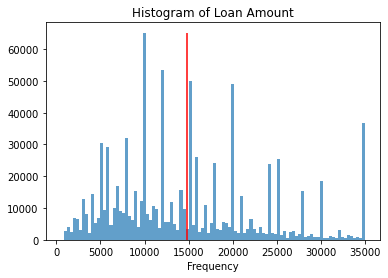

In [41]:
mean = df['loan_amnt'].mean()
df['loan_amnt'].hist(bins=100,grid = False,alpha= 0.7)
plt.title("Histogram of Loan Amount")
plt.xlabel("Loan Amount")
plt.xlabel("Frequency")
plt.vlines(mean,0,65000,colors='red')
put text mean

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=484ce270-3a41-4dd6-9050-10e2ff2d7d59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>